In [36]:
import sys
sys.path.append('../')
sys.path.append('../../')

%matplotlib inline

import project
p = project.Project()

In [37]:
p.load("teil1.dat")

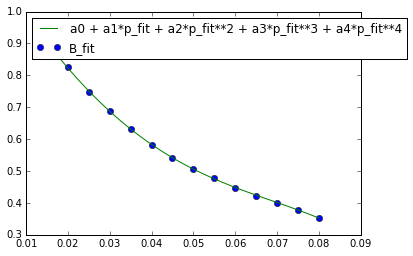

In [38]:
p.code("""
x = 1 [m]
y = 1 [T]

a0=1
a1=1
a2=1
a3=1
a4=1
p_fit = p/x
B_fit = B/y
"""
)
p.fit("a4*p_fit**4 + a3*p_fit**3 + a2*p_fit**2 + a1*p_fit + a0", ["p_fit","B_fit"], ["a0","a1","a2","a3","a4"], plot=True)

In [39]:
from sympy import diff
from quantities import parse_expr
fit_function = parse_expr("a4*p_fit**4 + a2*p_fit**2 + a1*p_fit + a0",p.data)
ableitung = diff(fit_function, p.data["p_fit"])
BdBdh = fit_function*ableitung

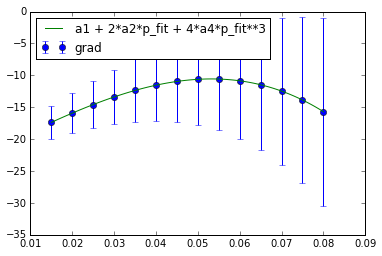

In [40]:
p.code("grad = "+str(ableitung))
p.plot(["p_fit",str(ableitung)], ["p_fit","grad"])

In [66]:
p.code("grad_Bi = " + str(BdBdh.subs(p.data["p_fit"],p.data["p_Bi_m"])))

FailedParse: (1:1) Expecting end of text. :
grad_Bi = (a1)*(a0)
^
program